In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [218]:
datetime.datetime(2020,12,1)

datetime.datetime(2020, 12, 1, 0, 0)

In [3]:
df = pd.read_csv("2020_air_pollution_data_india.gz")

In [4]:
df = df[df['id'] == 'site_1422']

In [5]:
def lookup(s):
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [6]:
df['datetime'] = lookup(df['datetime'])

In [7]:
df.set_index('datetime', inplace=True)

In [203]:
df.head()

,id,name,longitude,latitude,cityid,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,lockdown
datetime,,,,,,,,,,,,,,
2020-01-05 00:00:00,site_1422,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Delhi,Delhi,414.0,464.0,96.0,6.0,22.0,100.0,4.0,before_lockdown
2020-01-05 01:00:00,site_1422,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Delhi,Delhi,385.0,427.0,81.0,6.0,16.0,72.0,5.0,before_lockdown
2020-01-05 02:00:00,site_1422,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Delhi,Delhi,359.0,289.0,70.0,6.0,13.0,68.0,NaN,before_lockdown
2020-01-05 03:00:00,site_1422,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Delhi,Delhi,353.0,301.0,65.0,7.0,17.0,72.0,NaN,before_lockdown
2020-01-05 04:00:00,site_1422,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Delhi,Delhi,358.0,243.0,59.0,7.0,18.0,85.0,NaN,before_lockdown


In [10]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3359 entries, 2020-01-05 00:00:00 to 2020-05-10 23:00:00
Data columns (total 14 columns):
id           3359 non-null object
name         3359 non-null object
longitude    3359 non-null float64
latitude     3359 non-null float64
live         3359 non-null bool
cityid       3359 non-null object
stateid      3359 non-null object
PM2.5        3194 non-null float64
PM10         3112 non-null float64
NO2          3096 non-null float64
NH3          3066 non-null float64
SO2          3049 non-null float64
CO           2893 non-null float64
OZONE        3025 non-null float64
dtypes: bool(1), float64(9), object(4)
memory usage: 370.7+ KB


In [11]:
df.describe()

,longitude,latitude,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
count,3.359000e+03,3.359000e+03,3194.000000,3112.000000,3096.000000,3066.000000,3049.000000,2893.000000,3025.000000
mean,7.707190e+01,2.857103e+01,185.387915,182.383355,51.223191,8.542401,23.127583,43.684065,48.009917
std,7.149124e-12,9.345028e-13,132.960881,119.025459,34.294660,2.402486,12.851838,35.119453,41.812846
min,7.707190e+01,2.857103e+01,3.000000,9.000000,5.000000,3.000000,0.000000,0.000000,1.000000
25%,7.707190e+01,2.857103e+01,65.000000,101.000000,21.000000,7.000000,15.000000,18.000000,8.000000
50%,7.707190e+01,2.857103e+01,150.000000,149.000000,45.000000,8.000000,22.000000,33.000000,40.000000
75%,7.707190e+01,2.857103e+01,309.750000,235.000000,72.000000,10.000000,29.000000,57.000000,77.000000
max,7.707190e+01,2.857103e+01,500.000000,500.000000,190.000000,21.000000,106.000000,190.000000,201.000000


In [12]:
df.drop('live', axis=1, inplace=True) #dropping unwanted column

#### This dataset was recored every 1 hour till 19th may but it may miss some days so interpolating it.

In [178]:
df = df.resample('H').interpolate()

In [188]:
df['PM10'].fillna(500,inplace=True)

In [189]:
df.shape

(3360, 13)

### Pollution before lockdown and after lockdown

lockdown in india started at 25 March 2020

Phase 1: 25-March-2020

Phase 2: 15-April-2020

Phase 3: 04-May-2020

Phase 4: 18-May-2020


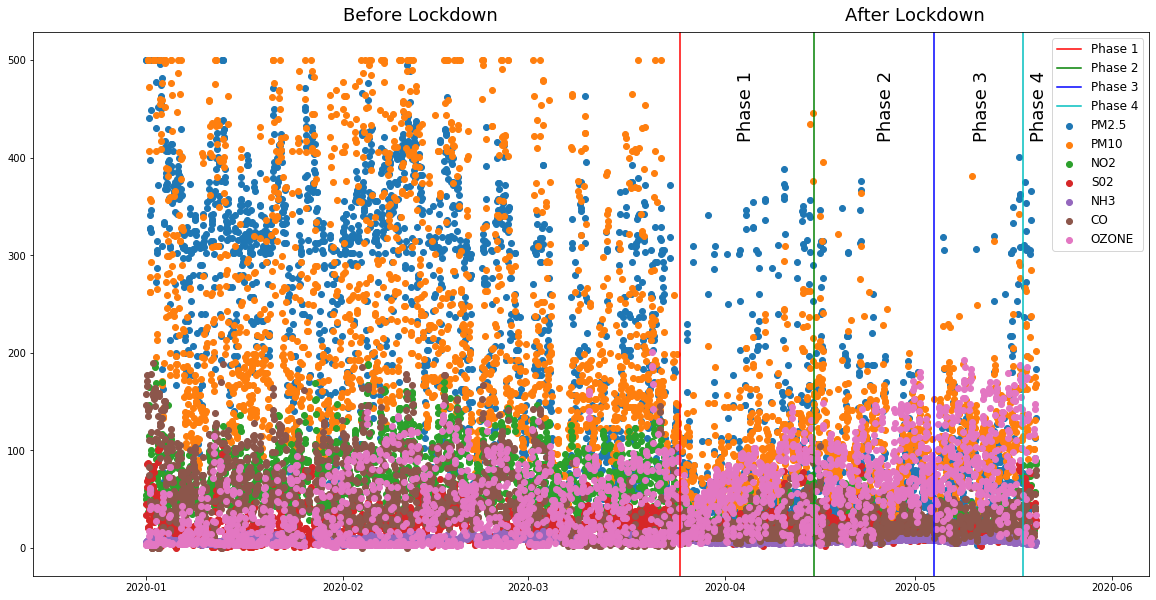

In [212]:
fig = plt.figure(figsize=[20,10])
axes = fig.subplots()
axes.scatter(df.index, df['PM2.5'], label = 'PM2.5')
axes.scatter(df.index, df['PM10'], label = 'PM10')
axes.scatter(df.index, df['NO2'], label = 'NO2')
axes.scatter(df.index, df['SO2'], label = 'S02')
axes.scatter(df.index, df['NH3'], label = 'NH3')
axes.scatter(df.index, df['CO'], label = 'CO')
axes.scatter(df.index, df['OZONE'], label = 'OZONE')
axes.axvline(x='2020-03-25', color='r', label = 'Phase 1')
axes.axvline(x='2020-04-15', color='g', label = 'Phase 2')
axes.axvline(x='2020-05-04', color='b', label = 'Phase 3')
axes.axvline(x='2020-05-18', color='c', label = 'Phase 4')
axes.text(s = 'Before Lockdown', x = '2020-02-01', y = 540, fontdict={'fontsize':18})
axes.text(s = 'After Lockdown', x = '2020-04-20', y = 540, fontdict={'fontsize':18})
axes.text(s = 'Phase 1', x = '2020-04-03', y = 420, fontdict={'fontsize':18, 'rotation':90})
axes.text(s = 'Phase 2', x = '2020-04-25', y = 420, fontdict={'fontsize':18, 'rotation':90})
axes.text(s = 'Phase 3', x = '2020-05-10', y = 420, fontdict={'fontsize':18, 'rotation':90})
axes.text(s = 'Phase 4', x = '2020-05-19', y = 420, fontdict={'fontsize':18, 'rotation':90})

axes.legend(fontsize=12)

In [180]:
df['lockdown'] = 'before_lockdown'
df.loc['2020-03-25':, 'lockdown'] = 'after_lockdown'

In [181]:
beforeLockdown = df.loc[df['lockdown'] == 'before_lockdown', ['PM2.5','PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].mean().reset_index()
beforeLockdown['lockdown'] = 'before'
beforeLockdown.rename({'index' : 'pollutant', 0 :'value' }, axis=1, inplace=True)
beforeLockdown

In [187]:
afterLockdown = df.loc[df['lockdown'] == 'after_lockdown', ['PM2.5','PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].mean().reset_index()
afterLockdown['lockdown'] = 'after'
afterLockdown.rename({'index' : 'pollutant', 0 :'value' }, axis=1, inplace=True)
afterLockdown

,pollutant,value,lockdown
0,PM2.5,95.636710,after
1,PM10,109.382151,after
2,NO2,24.096108,after
3,NH3,7.901509,after
4,SO2,22.323529,after
5,CO,25.259824,after
6,OZONE,71.152260,after


In [188]:
lockdownDf = pd.concat([beforeLockdown, afterLockdown], ignore_index=True)
lockdownDf

,pollutant,value,lockdown
0,PM2.5,248.037214,before
1,PM10,235.523043,before
2,NO2,69.814916,before
3,NH3,8.988932,before
4,SO2,23.692351,before
5,CO,57.642163,before
6,OZONE,31.466553,before
7,PM2.5,95.636710,after
8,PM10,109.382151,after
9,NO2,24.096108,after


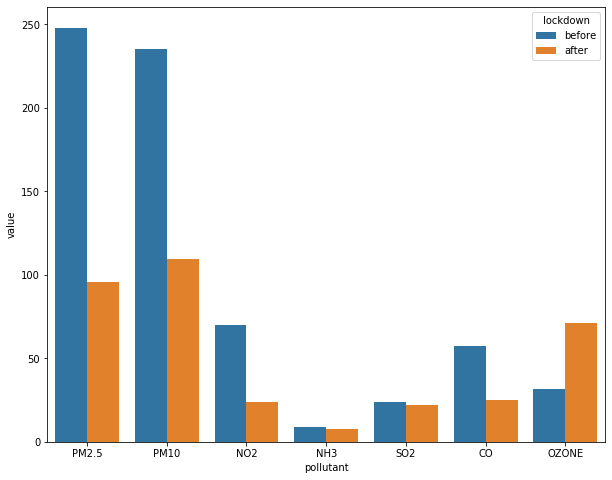

In [201]:
fig = plt.figure(figsize=[10,8])
ax = fig.subplots()
sns.barplot(x='pollutant', y='value',  hue='lockdown', data=lockdownDf, ax=ax)
plt.show()